Some simple reading 

[MC_Wikipage](https://en.wikipedia.org/wiki/Monte_Carlo_method)

[MC_Investopedia](https://www.investopedia.com/terms/m/montecarlosimulation.asp)

## Are you good at combinatorics?  


Let's consider a fair coin. 50% chances is heads and 50% chances it is tail. 
Let us write 1 for heads and 0 for tails. 

If I launch this coin 2 times, what is the probability that I get 2 heads? 
If I launch it 3 times, what is the probability that I get heads 2 times? 
What if I launch it 300 times?  

    

Actually it is not difficult. 

The proabability is given by 

$1/2^{300} \times 300!/ (100! 200!)$  

But we can think of similar problems but more complex ... actually this is how it started. 

Stanislaw Ulam was in hospital playing solitair and he was wondering what is the probability of winning ... that is a much harder combinatorics problem, but really of the same type $\rightarrow$ he figured out a completely new approach to solve it, what we now call Monte Carlo method.   

The key idea is this: why don't I just do as many realizations of solitaire game as I can, and then I infer the probability from the number of times I win divided by the total number of games played? (Note that Ulam had access to one of the very first computers since he was working at Los Alamos in the Manhattan project). 


Let us make things a bit easirer by considering again the tossing of a coin $N_c=300$ times. 
We do these $N_c$ tosses an $N_s$ (number of samples) times.    
Each of these times we count how many heads we have. 

In [2]:
Ns = 20; 
Nc = 300; 

This function counts the number of heads if you toss the coin $N_c$ times 

for loop 

In [3]:
# i want to add up 
s = 0 
for i = 1 : 10 
    s = s + i
    display(s)  
end

1

3

6

10

15

21

28

36

45

55

if statement 

In [4]:
r = 2 
if r < 3 
    display("well done!") 
else 
    display("nonsense") 
end

"well done!"

In [6]:
function number_of_heads(Nc) 
    s = 0; # set the counter to 0 
    for ic = 1:Nc #starts a for loop 
        r = rand(); # draw a random number 
        if r>0.5 # check whether r is larger than 0.5 
            s = s+1; #if true, then increase the counter by 1 
        end
    end
    return s
end

number_of_heads (generic function with 1 method)

In [13]:
a = number_of_heads(10) 

6

This function returns a vector which at position $i$ tells us what is the frequency of having $i-1$ heads. 

In [7]:
function vector_number_of_heads(Nc, Ns) 
    Fh = zeros(Nc+1,1); # a vector where we store the frequency of each number of heads   
    
    # now do a loop ... for each realization compute the number of heads    
    for is = 1:Ns
        Nh = number_of_heads(Nc); 
        Fh[Nh] += 1; 
    end
    return Fh./Ns; 
end


vector_number_of_heads (generic function with 1 method)

Now we can finall run the main program, which looks super simple!!! 

In [9]:
Ns = 50; # number of times I play the solitary game 
Nc = 10; # number of tosses in each game

Fh = vector_number_of_heads(Nc, Ns);  

In [10]:
Fh[10]

0.0

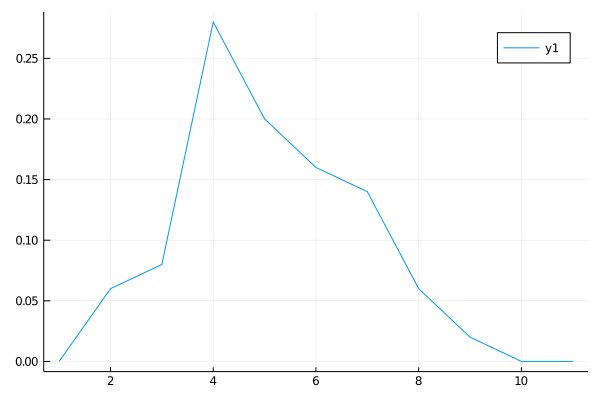

In [11]:
using Plots #you need to tell Julia that you are going to use functions from Plots 

plot(Fh)

There are simple ways to improve this plotting and analysis, like binning, but maybe we will get to this later. 

## Can you compute the area of a circle?   

The point that we want to get across here is that Monte Carlo methods are also used when there is no randomness in a system, but maybe just large or complicated structures. Then one explores as many (meaningful) scenarios as possible and try to have a good approximation of the exact result. 

One typical example is the computation of integrals in large dimensions of maybe strange structures. 

See these figures for example. 

<img src="Fractal.jpg" alt="Image Test" style="width:300px"> 

<img src="Lung.jpg" alt="Image Test" style="width:300px">


A Monte Carlo approach would be to randomly sample points in the space and check how many fulfill the property we are looking at. 

Let us take the example of a circle, the area of a quarter of a circle is $\pi/4$. 

<img src="QuarterCircle.gif" alt="Image Test" style="width:300px"> 

and let us do exactly this!!! 

function that gives 1 if a point is within the circle, and 0 if it is outsied 

In [15]:
function incircle(x,y)
    if x^2+y^2<1 
        return 1
    end
    return 0
end

incircle (generic function with 1 method)

In [16]:
function area_quarter(Ns)
    s=0; 
    for is = 1:Ns 
        x = rand(); 
        y = rand(); 
        s += incircle(x,y); 
    end
    return s/Ns; 
end

area_quarter (generic function with 1 method)

In [17]:
Ns = 100; 
est_pi = 4*area_quarter(Ns)

3.28

With a bit more careful analysis we can also get a confidence interval that $\pi$ is between two values etc. But maybe this is beyond what we can do in these 2 days. 

## Can you simulate diffusion?   

Let us do another introductory example that can help us towards simulating traffic. 
Let us consider brownian motion 

<img src="BrownianMotion.gif" alt="Image Test" style="width:300px"> 

Here a big particle is pushed in different directions by small particles which form a bath ... this is basically what Brown observed in 1827 for pollens in water. 

One could simulate the motion of all the particles, the pollen and all the water molecules, but this would be extremely difficult. Instead one could simulate the pollen particle as it is hit, at-random, to move in a different direction.  

This dynamics is at the basis of what we refer to as diffusion. 

Here we are going to consider a simple example. We take a particle starting at position $x=0$, and at each discrete time step we move it either one step to the left or one step to the right. 

Say we want to check the motion for $Nt=100$ steps. 
We will simulate $Ns$ samples trajectories and then analyze them (this will be very similar to what we could do with traffic). 


We are going to produce a matrix of histories $H$. 

Each row corresponds to a different possible evolution, while each column corresponds to a different time. 

In [93]:
Ns = 10; # samples 
Nt = 10; # time steps 

H=zeros(Ns, Nt); 

Function that, given the current state of the different trajectories, gives the next values 

In [94]:
function next_step(positions) 
    new_positions = copy(positions); 
    aux = size(positions); #checks what is the dimension of the array "positions" 
    ns = aux[1]; #number of cars 
    for is = 1:ns 
        r = rand(); 
        if r>0.5 
            new_positions[is] = positions[is] + 1; 
        else
            new_positions[is] = positions[is] - 1;
        end
    end
    return new_positions
end    
        

next_step (generic function with 1 method)

In [95]:
function evolve_one_step_H!(H,time_step)
    positions = H[:,time_step]; 
    H[:,Int64[time_step+1]] = next_step(positions); 
end

evolve_one_step_H! (generic function with 1 method)

In [96]:
function evolve_H(Ns, Nt) 
    H=zeros(Ns, Nt); 
    for it = 1:Nt-1 
        evolve_one_step_H!(H,it); 
    end
    return H
end

evolve_H (generic function with 1 method)

In [97]:
Ns = 750; 
Nt = 150; 

H = evolve_H(Ns, Nt); 




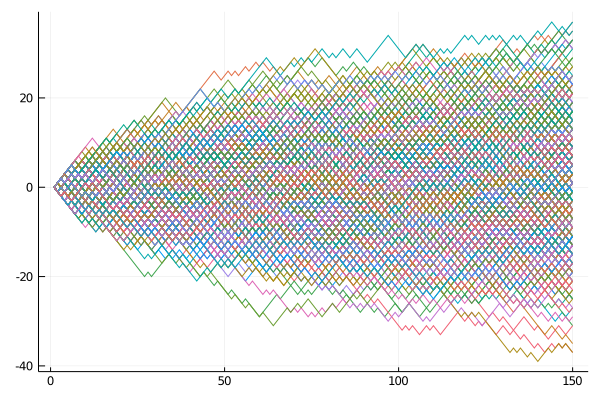

In [98]:
plot(transpose(H), legend = false)

Function that returns the mean position and the standard deviation at each point in time 

In [99]:
function mean_std_position(H)
    Nc, Nt = size(H);
    mean = zeros(Nt,1); 
    std = zeros(Nt,1); 
    for it = 1:Nt 
        mean[it] = sum(H[:,it])/Nc; 
        std[it] = sqrt((sum(H[:,it].^2)/Nc - (mean[it])^2)); 
    end
    return mean, std
end

mean_std_position (generic function with 1 method)

In [100]:
m,st = mean_std_position(H)

([0.0; -0.056; … ; 1.2613333333333334; 1.2346666666666666], [0.0; 0.9984307687566525; … ; 12.434081049902947; 12.541913658697473])

Here we plot all the histories, together witht he mean and the standard deviation 

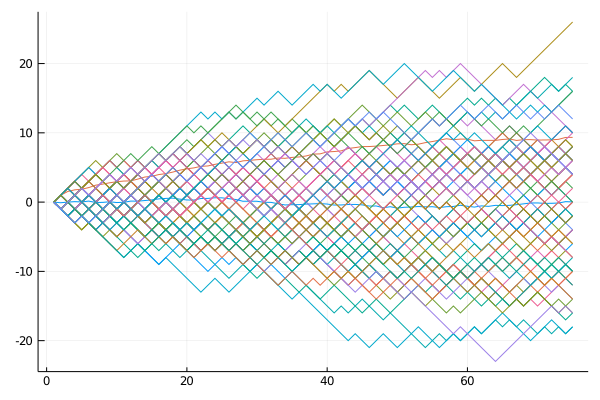

In [47]:
p = plot(m) 
p = plot!(p, st) 
plot!(p, transpose(H), legend = false) 

What is frequency of each position at a given time? 
Here is a function that computes that. 

In [101]:
function frequency_positions(H, time_step)
    Ns, Nt = size(H); 
    f_vec = zeros(2*time_step+1,1); 
    for ipos = 1:2*time_step+1 # go through all positions 
        pos = ipos-1-time_step; 
        s = 0; 
        for is = 1:Ns # check how many pollens are at that position 
            if H[is, time_step] == pos 
                s +=1; 
            end
        end
        f_vec[ipos] = s; 
    end
    return f_vec/Ns
end

frequency_positions (generic function with 1 method)

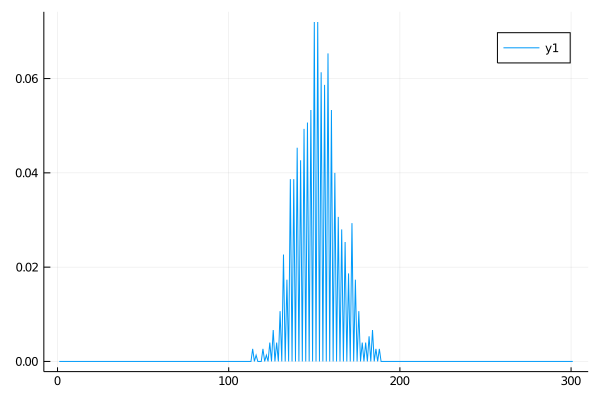

In [102]:
plot(frequency_positions(H, 150))